Adjusted Rand Score: 0.3329987776477635
Noise Adjusted Rand Score: 0.384971902352142


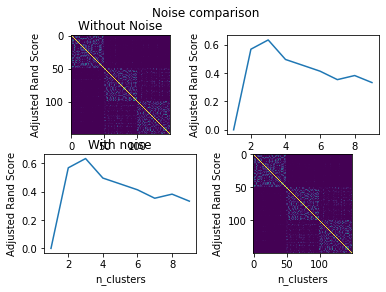

In [28]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
X1 = iris.data
X = iris.data + (0.1 * np.random.rand(150,4))
#print(X.shape)
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)

clf1 = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

clf1.fit(X1)

sim_mat = clf.transform()
sim_mat1 = clf1.transform()

#print(sim_mat)
#print(sim_mat1)

fig, axs = plt.subplots(2,2)
fig.suptitle('Noise comparison')
axs[0,0].imshow(sim_mat)
axs[1,1].imshow(sim_mat1)
axs[0,0].set_title('Without Noise')
axs[1,0].set_title('With noise')


R = []
I = []
for i in range (1,10):
    I.append(i)
    cluster = AgglomerativeClustering(n_clusters=i, 
                                      memory=None, 
                                      connectivity=None)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(iris.target, predict_labels)
    R.append(score)

K = []
O = []
for i in range (1,10):
    O.append(i)
    cluster = AgglomerativeClustering(n_clusters=i, 
                                      memory=None, 
                                      connectivity=None)
    predict_labels1 = cluster.fit_predict(sim_mat1)
    score1 = adjusted_rand_score(iris.target, predict_labels1)
    K.append(score1)

axs[0,1].plot(I,R)
axs[1,0].plot(I,R)
for ax in axs.flat:
    ax.set(ylabel='Adjusted Rand Score', xlabel='n_clusters')



#print("labels\n", iris.target)
#print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)
print("Noise Adjusted Rand Score:", score1)


In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest
# generate 2d classification dataset
noise =  np.random.rand(10,10,10)
Clear1 = make_blobs(n_samples=100, centers=3, n_features=100)
Clear = noise + Clear1
x = Clear1[0] 
print(x.shape)
noise1 =  np.random.rand(100,100)
X = x + noise1
y = Clear1[1]
print(y.shape)
noise2 =  np.random.rand(100)
Y = y + noise2
Clear1.scatterplot(X[:,0],X[:,1], hue = y, ax = ax1)
#scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()